In [1]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas

Fri Nov 23 2018 

CPython 3.6.6
IPython 6.5.0

numpy 1.15.1
scipy 1.1.0
sklearn 0.19.1
pandas 0.23.4

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 4.9.0-7-amd64
machine    : x86_64
processor  : 
CPU cores  : 12
interpreter: 64bit


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import nolds
import data
import mne

PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
DATA_ROOT = os.path.abspath(os.path.join(PROJ_ROOT, 'data'))
PROCESSED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'processed'))
RAW_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'raw'))
LABELED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'labeled'))
DURATIONS_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'durations'))
print(PROJ_ROOT)
print(DATA_ROOT)
print(PROCESSED_ROOT)
import sys
sys.path.append(os.path.join(PROJ_ROOT, 'src'))
CHANNEL_NAMES = ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2',
                 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
META_COLUMN_NAMES = ['freq', 'RESP_4W', 'RESP_FIN', 'REMISE_FIN', 'AGE', 'SEX', 'M_1',
       'M_4', 'M_F', 'délka léčby', 'lék 1', 'lék 2', 'lék 3', 'lék 4']
META_FILE_NAME = 'DEP-POOL_Final_144.xlsx'
meta_df = pd.read_excel(os.path.join(RAW_ROOT, META_FILE_NAME), index_col='ID', names=META_COLUMN_NAMES)

raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, '1a.fif'))
t = pd.DataFrame(raw_fif.get_data())
data = pd.DataFrame(np.transpose(t.values), columns=CHANNEL_NAMES)
data = np.transpose(data.values)
len(data[0])

/home/kovar/thesis_project
/home/kovar/thesis_project/data
/home/kovar/thesis_project/data/processed
Opening raw data file /home/kovar/thesis_project/data/processed/1a.fif...
This filename (/home/kovar/thesis_project/data/processed/1a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 15000 =      0.000 ...    60.000 secs
Ready.


<ipython-input-1-01b5b9e5c29d>:29: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/1a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, '1a.fif'))


15001

In [9]:
from lib.nolitsa.nolitsa import surrogates
from scipy.stats import ks_2samp
from measures.algorithms import compute_lyapunov

def plot_surr(x, chan_num, f=compute_lyapunov, statname=r'$\lambda_1$'):
    surr_sers = [surrogates.iaaft(x)[0] for _ in range(19)]
    surr_stats = [f(surr) for surr in surr_sers]
    true_stat = f(x)
    sigma = np.abs(np.mean(surr_stats)-true_stat) / np.std(surr_stats)
    print(f'CHANNEL {chan_num}')
    print(f'\sigma = {sigma}')
    plt.figure(1)
    plt.title(f'CHANNEL {chan_num}')
    plt.xlabel(statname)
    plt.vlines(surr_stats, 0.0, 0.5, label='surrogate')
    plt.vlines(true_stat, 0.0, 1.0, color='red', label='true')
    plt.legend()
    plt.show()

CHANNEL 0
\sigma = 4.173092912669855


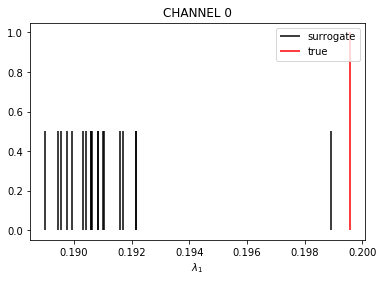

CHANNEL 1
\sigma = 1.937374712346965


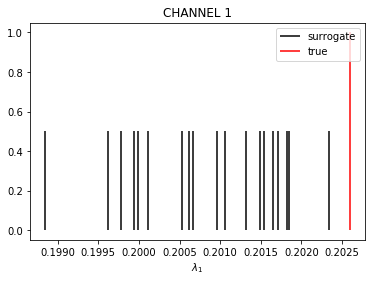

CHANNEL 2
\sigma = 1.7452877512005593


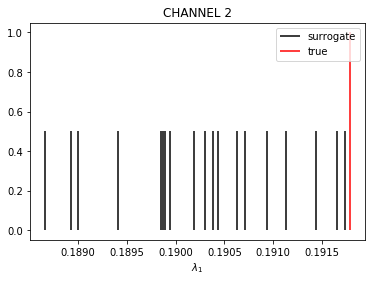

CHANNEL 3
\sigma = 1.544212241599788


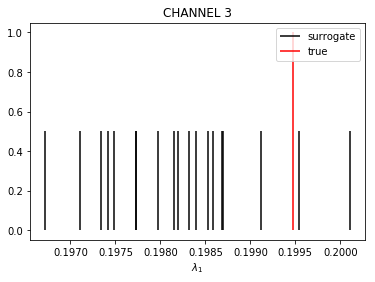

CHANNEL 4
\sigma = 1.53648096603513


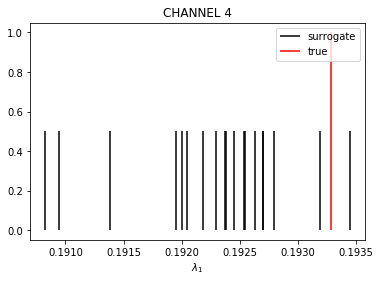

CHANNEL 5
\sigma = 2.357879681870655


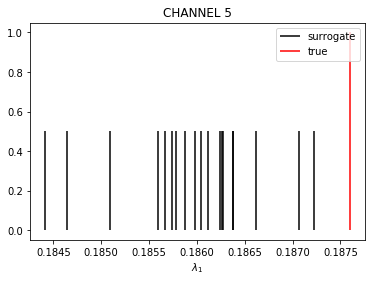

CHANNEL 6
\sigma = 4.33348483651872


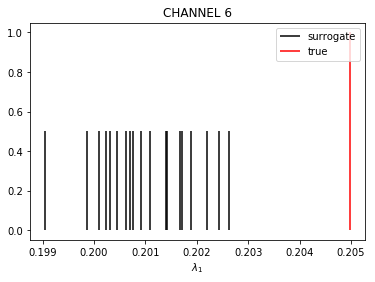

CHANNEL 7
\sigma = 1.0813680734848008


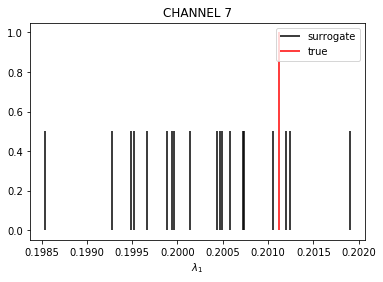

CHANNEL 8
\sigma = 2.014546977917678


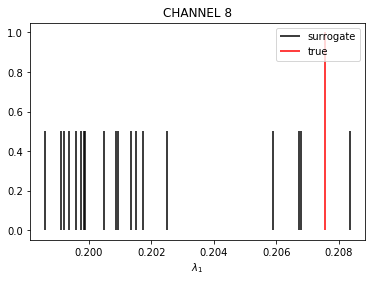

CHANNEL 9
\sigma = 0.8725536925070575


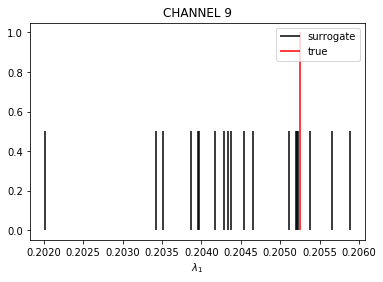

CHANNEL 10
\sigma = 0.8707223645282985


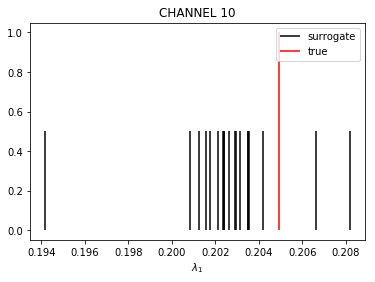

CHANNEL 11
\sigma = 0.14917432005874262


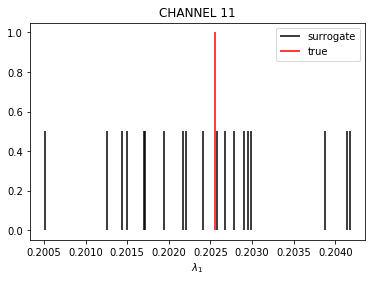

CHANNEL 12
\sigma = 3.0134859172213417


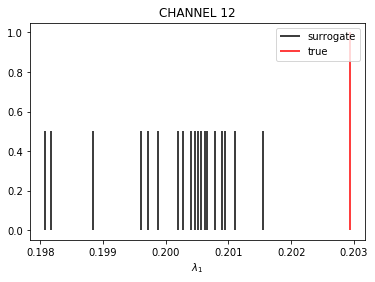

CHANNEL 13
\sigma = 3.12975810136666


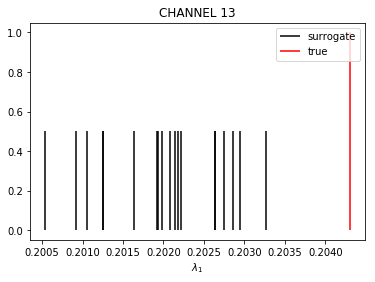

CHANNEL 14
\sigma = 2.4977299304663574


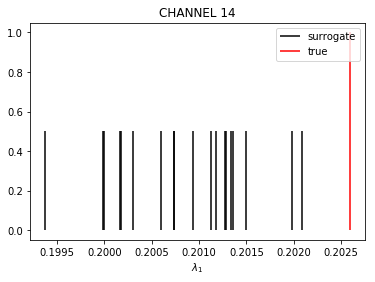

CHANNEL 15
\sigma = 0.943127042997619


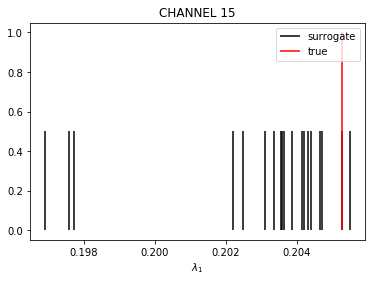

CHANNEL 16
\sigma = 5.2667344697777265


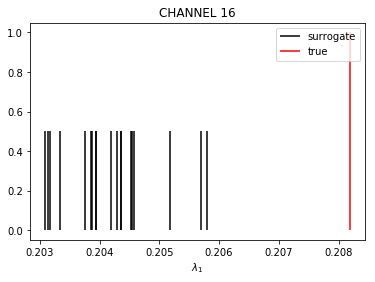

CHANNEL 17
\sigma = 1.491660242017683


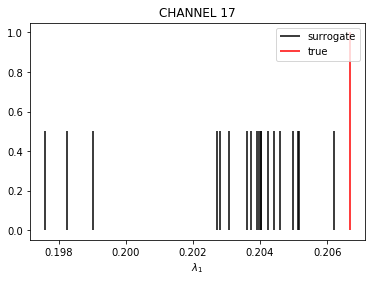

CHANNEL 18
\sigma = 0.5807937933671464


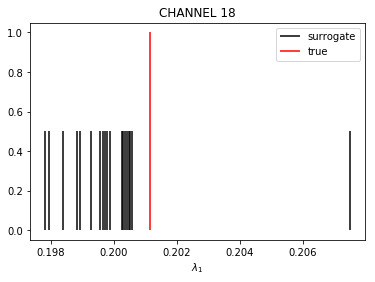

In [10]:
for i, chan_data in enumerate(data):
    plot_surr(chan_data, i)